In [1]:
import pandas as pd
import numpy as np

In [3]:
# fetch data
train_df = pd.read_csv('/Users/adityan/Work/ds_practice/npci_ds_test/NPCI_DS_ML2/train.csv').drop(columns=['Unnamed: 0'])
print(train_df.shape)
train_df.head(5)

(362, 16)


,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


# EDA

In [4]:
# Check Datatype
train_dtype_df = train_df.dtypes.reset_index()
train_dtype_df.rename(columns={'index':'column',0:'dtype'},inplace=True)
train_dtype_df

,column,dtype
0,surface_area,float64
1,agricultural_land,float64
2,forest_area,float64
3,armed_forces_total,float64
4,urban_pop_major_cities,float64
5,urban_pop_minor_cities,float64
6,national_income,object
7,inflation_annual,float64
8,inflation_monthly,float64
9,inflation_weekly,float64


In [5]:
# Check Fill rate
train_null_count_df = train_df.isnull().sum().reset_index()
train_null_count_df.rename(columns={'index':'column',0:'null_count'},inplace=True)
train_null_count_df['fillrate'] = train_null_count_df.apply(lambda x: (len(train_df) - x['null_count'])/len(train_df)*100, axis=1)
train_null_count_df

,column,null_count,fillrate
0,surface_area,0,100.000000
1,agricultural_land,4,98.895028
2,forest_area,5,98.618785
3,armed_forces_total,44,87.845304
4,urban_pop_major_cities,2,99.447514
5,urban_pop_minor_cities,2,99.447514
6,national_income,0,100.000000
7,inflation_annual,216,40.331492
8,inflation_monthly,206,43.093923
9,inflation_weekly,342,5.524862


In [6]:
# Check Cardinality for dtype = object only
cat_col = [col for col in train_df if train_df[col].dtypes in ['object']]
carinality_dict = dict()
for col in cat_col:
    carinality_dict[col] = train_df[col].nunique()
cardinality_df = pd.DataFrame(list(carinality_dict.items()), columns=['column','cardinality'])
cardinality_df

,column,cardinality
0,national_income,7
1,mobile_subscriptions,5
2,internet_users,198
3,improved_sanitation,6
4,women_parliament_seats_rate,4


In [7]:
# Data Summary
df = train_dtype_df.merge(train_null_count_df, on='column', how='inner')
data_summary = df.merge(cardinality_df, on ='column', how='left')
data_summary

,column,dtype,null_count,fillrate,cardinality
0,surface_area,float64,0,100.000000,NaN
1,agricultural_land,float64,4,98.895028,NaN
2,forest_area,float64,5,98.618785,NaN
3,armed_forces_total,float64,44,87.845304,NaN
4,urban_pop_major_cities,float64,2,99.447514,NaN
5,urban_pop_minor_cities,float64,2,99.447514,NaN
6,national_income,object,0,100.000000,7.0
7,inflation_annual,float64,216,40.331492,NaN
8,inflation_monthly,float64,206,43.093923,NaN
9,inflation_weekly,float64,342,5.524862,NaN


['surface_area', 'agricultural_land', 'forest_area', 'armed_forces_total', 'urban_pop_major_cities', 'urban_pop_minor_cities', 'inflation_annual', 'inflation_monthly', 'inflation_weekly', 'secure_internet_servers_total', 'life_expectancy']


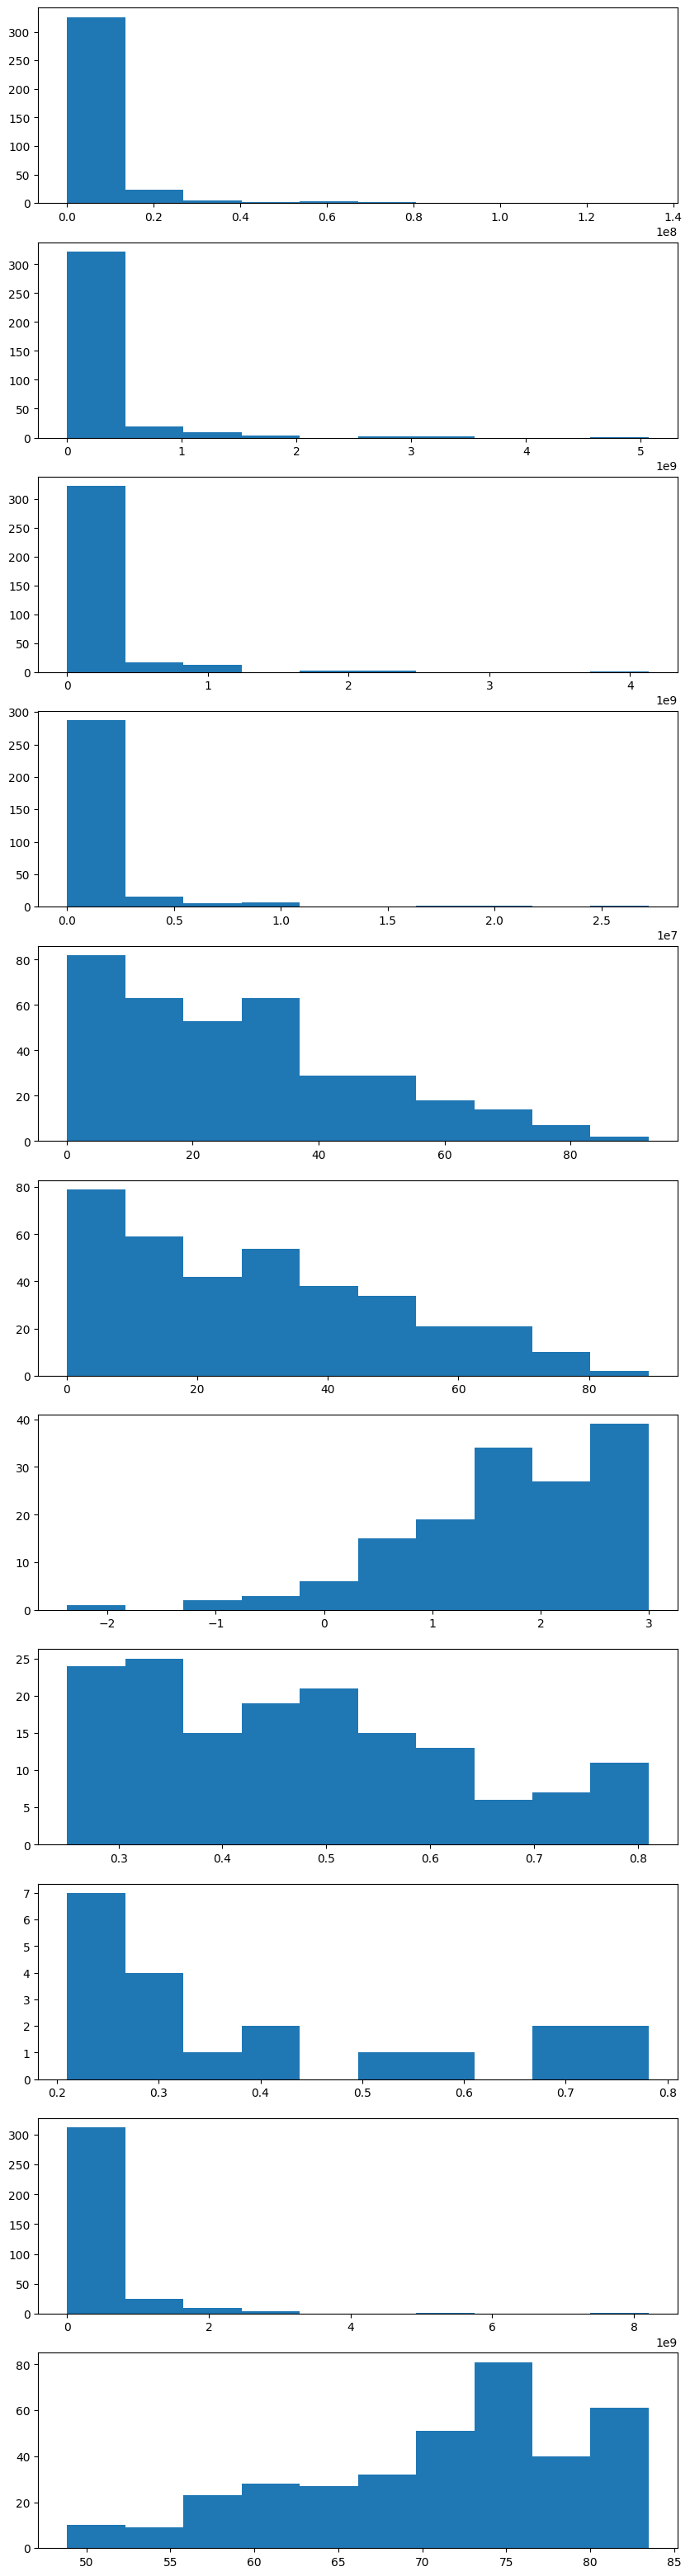

In [8]:
# Check Distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10,40))
num_col = [col for col in train_df.columns if train_df[col].dtypes in ['float64','int64']]
print(num_col)
c = 1
for col in num_col:
    plt.subplot(len(num_col),1,c)
    plt.hist(train_df[col])
    c+=1
plt.show()

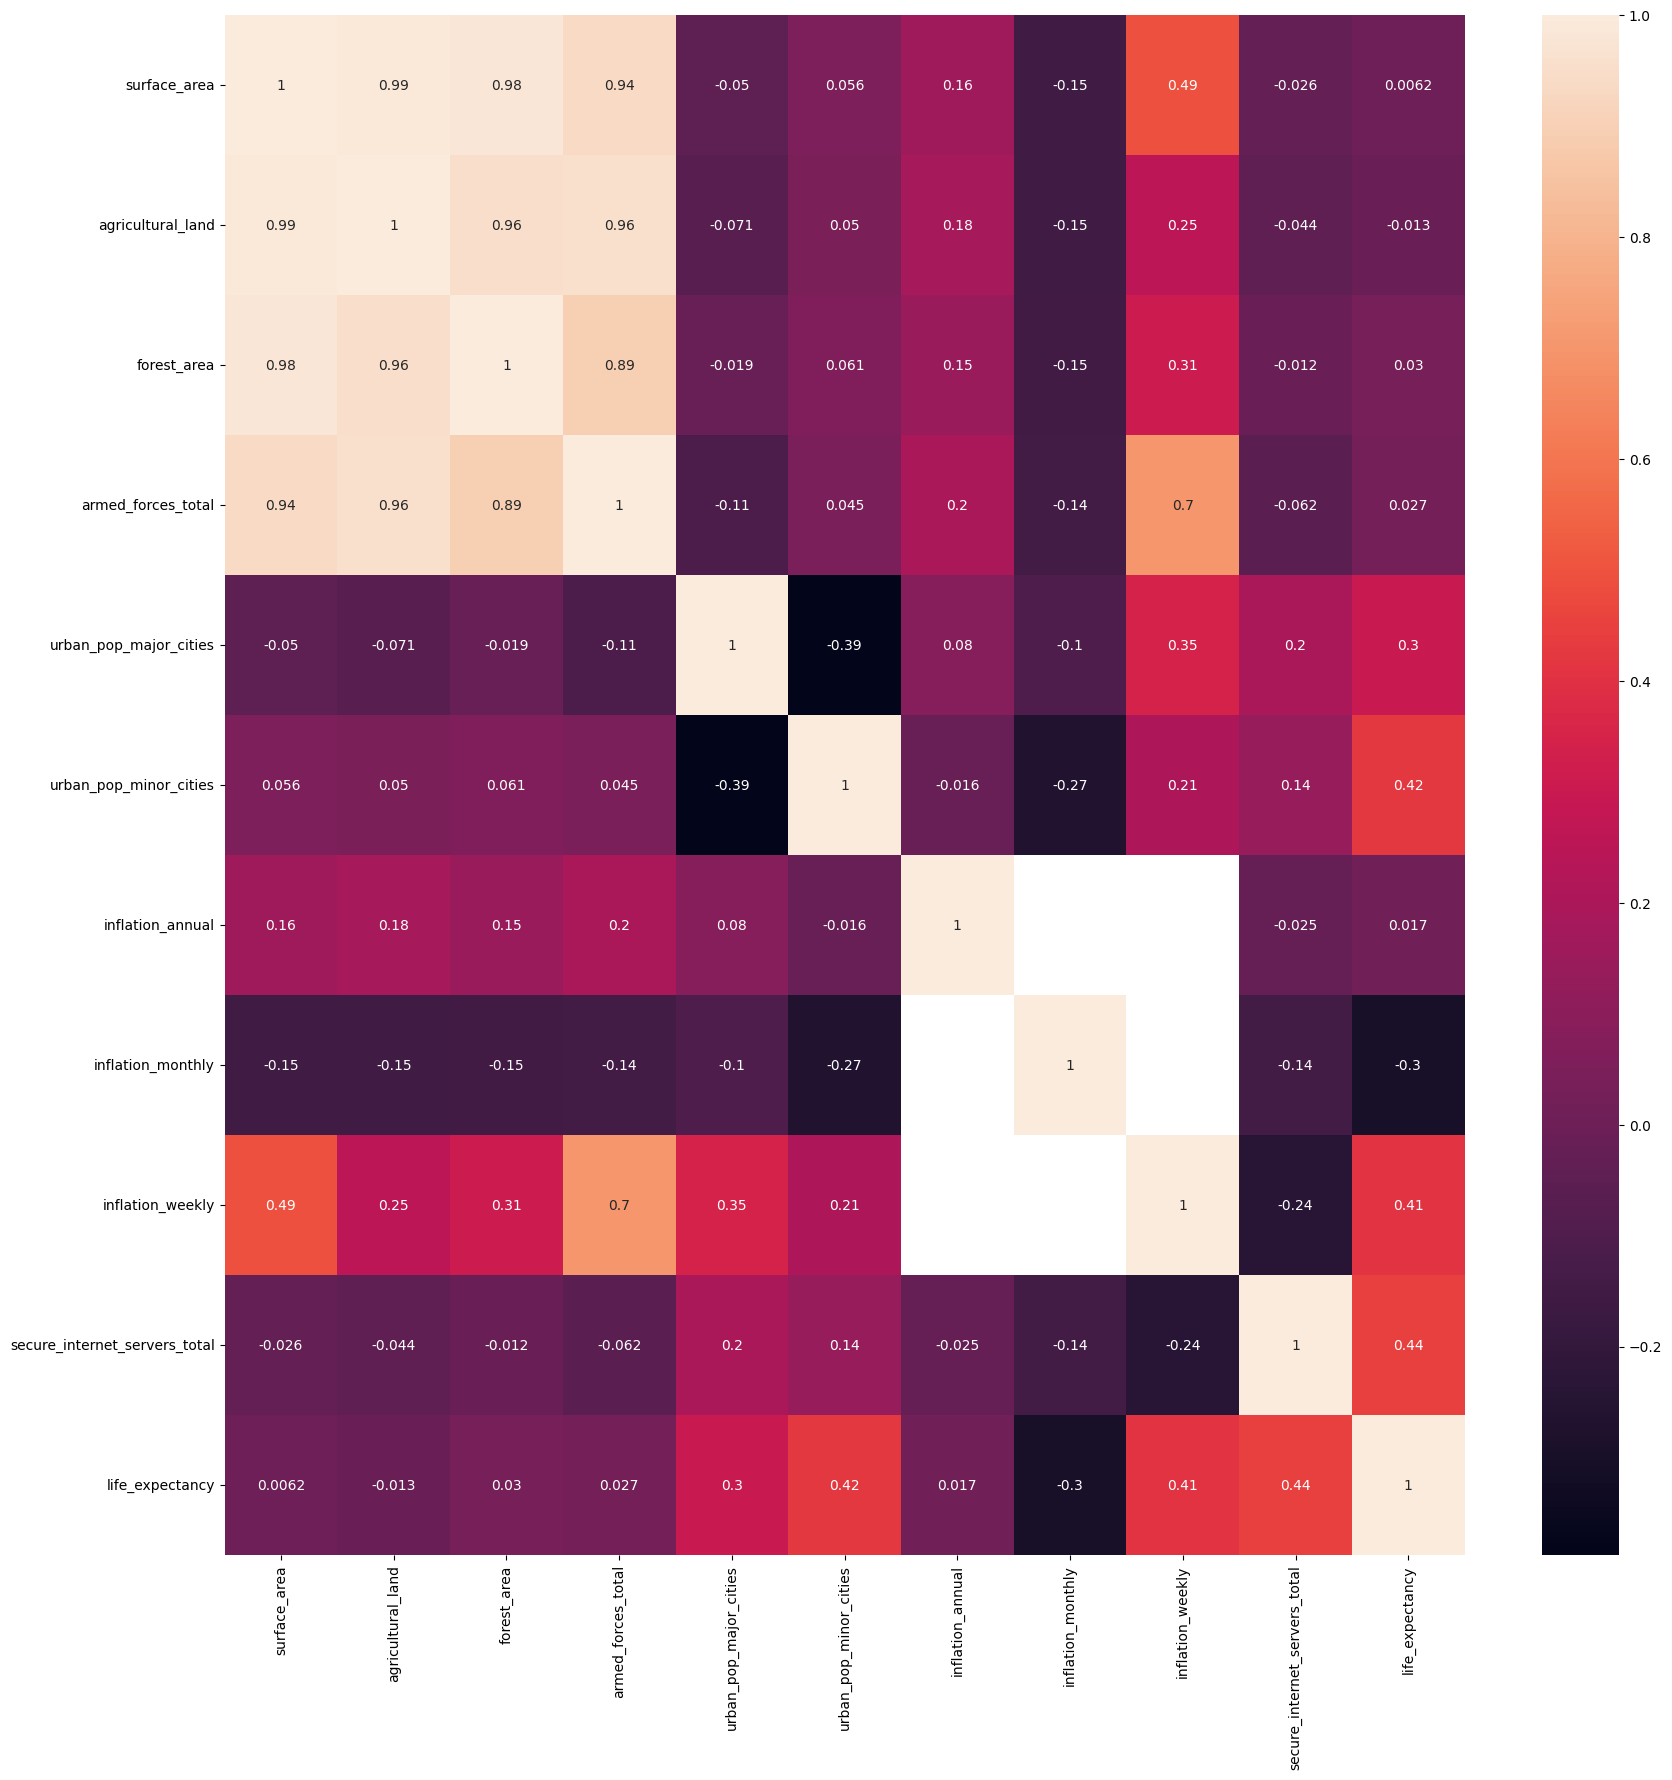

In [9]:
# Multicollinearity
import seaborn as sns

train_num_df = train_df[num_col]
corr_df = train_num_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True)
plt.show()

In [10]:
print(num_col)

['surface_area', 'agricultural_land', 'forest_area', 'armed_forces_total', 'urban_pop_major_cities', 'urban_pop_minor_cities', 'inflation_annual', 'inflation_monthly', 'inflation_weekly', 'secure_internet_servers_total', 'life_expectancy']


<Axes: >

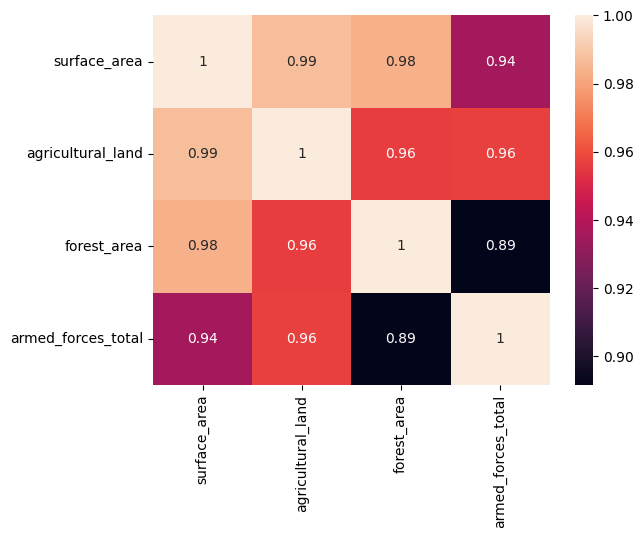

In [11]:
# Analysis on 1 set of correlated columns
sns.heatmap(train_df[['surface_area', 'agricultural_land', 'forest_area', 'armed_forces_total']].corr(), annot=True)

                   inflation_annual  inflation_monthly  inflation_weekly
inflation_annual                1.0                NaN               NaN
inflation_monthly               NaN                1.0               NaN
inflation_weekly                NaN                NaN               1.0


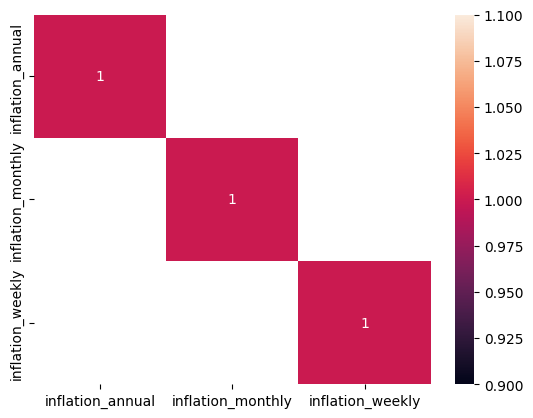

In [12]:
# Analysis on 2 set of correlated columns
sns.heatmap(train_df[['inflation_annual', 'inflation_monthly', 'inflation_weekly']].corr(), annot=True)
print(train_df[['inflation_annual', 'inflation_monthly', 'inflation_weekly']].corr())

In [13]:
train_df['inflation_annual_calc'] = np.where(train_df['inflation_annual'].isnull()
                                               ,train_df['inflation_monthly']*12
                                               ,train_df['inflation_annual']
                                              )
print(train_df[['inflation_annual','inflation_annual_calc']].isnull().sum())

inflation_annual         216
inflation_annual_calc     60
dtype: int64


In [14]:
train_df[['inflation_annual','inflation_annual_calc']].corr()

,inflation_annual,inflation_annual_calc
inflation_annual,1.0,1.0
inflation_annual_calc,1.0,1.0


In [15]:
print(cat_col)

['national_income', 'mobile_subscriptions', 'internet_users', 'improved_sanitation', 'women_parliament_seats_rate']


In [16]:
for col in cat_col:
    print(train_df[col].value_counts())

national_income
low            81
very low       77
medium low     76
unknown        48
high           37
medium high    31
very high      12
Name: count, dtype: int64
mobile_subscriptions
more than 1 per person    188
less than 1 per person    164
unknown                     7
more than 2 per person      2
more than 3 per person      1
Name: count, dtype: int64
internet_users
41 per 100 people      8
60 per 100 people      7
46 per 100 people      7
unknown                6
66 per 100 people      5
                      ..
64 per 1000 people     1
154 per 1000 people    1
37 per 1000 people     1
30 per 1000 people     1
374 per 1000 people    1
Name: count, Length: 198, dtype: int64
improved_sanitation
very high access    155
low access           55
medium access        54
high access          47
very low access      33
no info              18
Name: count, dtype: int64
women_parliament_seats_rate
[0%-25%)     249
[25%-50%)     82
unknown       30
[50%-75%)      1
Name: count, dtype: 

In [18]:
national_income_cond_list = [train_df['national_income']=='unknown'
                             ,train_df['national_income']=='very low'
                             ,train_df['national_income']=='medium low'
                             ,train_df['national_income']=='low'
                             ,train_df['national_income']=='high'
                             ,train_df['national_income']=='medium high'
                             ,train_df['national_income']=='very high']  
national_income_choice_list = [np.nan,1,2,3,4,5,6]

mobile_subscription_cond_list = [train_df['mobile_subscriptions']=='unknown'
                                ,train_df['mobile_subscriptions']=='less than 1 per person'
                                ,train_df['mobile_subscriptions']=='more than 1 per person'
                                ,train_df['mobile_subscriptions']=='more than 2 per person'
                                ,train_df['mobile_subscriptions']=='more than 3 per person']
mobile_subscription_choice_list = [np.nan,1,2,3,4]

improved_sanitation_cond_list = [train_df['improved_sanitation']=='no info'
                                 ,train_df['improved_sanitation']=='very low access'
                                 ,train_df['improved_sanitation']=='low access'
                                 ,train_df['improved_sanitation']=='medium access'
                                 ,train_df['improved_sanitation']=='high access'
                                 ,train_df['improved_sanitation']=='very high access']
improved_sanitation_choice_list = [np.nan,1,2,3,4,5]

women_parliament_seats_rate_cond_list = [train_df['women_parliament_seats_rate']=='unknown'
                                         ,train_df['women_parliament_seats_rate']=='[0%-25%)'
                                         ,train_df['women_parliament_seats_rate']=='[25%-50%)'
                                         ,train_df['women_parliament_seats_rate']=='[50%-75%)']
women_parliament_seats_rate_choice_list = [np.nan,1,2,3]

train_df['national_income_enc'] = np.select(national_income_cond_list
                                                                     ,national_income_choice_list
                                                                     ,default=0)
train_df['mobile_subscriptions_enc'] = np.select(mobile_subscription_cond_list
                                                                     ,mobile_subscription_choice_list
                                                                     ,default=0)
train_df['improved_sanitation_enc'] = np.select(improved_sanitation_cond_list
                                                                     ,improved_sanitation_choice_list
                                                                     ,default=0)
train_df['women_parliament_seats_rate_enc'] = np.select(women_parliament_seats_rate_cond_list
                                                                     ,women_parliament_seats_rate_choice_list
                                                                     ,default=0)
train_df.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,...,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,inflation_annual_calc,national_income_enc,mobile_subscriptions_enc,improved_sanitation_enc,women_parliament_seats_rate_enc
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,...,0 per 1000 people,NaN,high access,[0%-25%),69.494195,NaN,NaN,1.0,4.0,1.0
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,...,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366,6.977676,1.0,1.0,2.0,1.0
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,...,90 per 100 people,1.656589e+09,no info,unknown,81.300000,NaN,NaN,2.0,NaN,NaN
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,...,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197,1.374906,4.0,2.0,5.0,2.0
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,...,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561,-0.044229,NaN,2.0,5.0,2.0


In [19]:
train_df['internet_users'] = np.where(train_df['internet_users']=='unknown','0 per 100 people',train_df['internet_users'])
train_df['internet_user_percent'] = train_df['internet_users'].apply(lambda x: float(x.split()[0])/float(x.split()[2]))
train_df[['internet_users','internet_user_percent']]

,internet_users,internet_user_percent
0,0 per 1000 people,0.000
1,154 per 1000 people,0.154
2,90 per 100 people,0.900
3,76 per 100 people,0.760
4,350 per 1000 people,0.350
...,...,...
357,90 per 100 people,0.900
358,84 per 100 people,0.840
359,58 per 100 people,0.580
360,44 per 100 people,0.440


In [20]:
select_cols = ['surface_area','armed_forces_total','urban_pop_major_cities','urban_pop_minor_cities','national_income_enc'
               ,'inflation_annual_calc','mobile_subscriptions_enc','improved_sanitation_enc','women_parliament_seats_rate_enc'
               ,'secure_internet_servers_total','internet_user_percent','life_expectancy']
train_final_df = train_df[select_cols]
print(train_final_df.shape)
train_final_df.head()

(362, 12)


,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income_enc,inflation_annual_calc,mobile_subscriptions_enc,improved_sanitation_enc,women_parliament_seats_rate_enc,secure_internet_servers_total,internet_user_percent,life_expectancy
0,120540.0,1379000.0,55.747169,4.688831,NaN,NaN,1.0,4.0,1.0,NaN,0.000,69.494195
1,752610.0,16500.0,16.890687,23.136313,1.0,6.977676,1.0,2.0,1.0,2.623624e+06,0.154,59.237366
2,1396.0,NaN,18.390090,23.139910,NaN,NaN,2.0,NaN,NaN,1.656589e+09,0.900,81.300000
3,2758812.0,1518650.0,50.966885,24.522427,4.0,1.374906,2.0,5.0,2.0,6.625072e+08,0.760,81.373197
4,340.0,NaN,5.311885,30.271115,NaN,-0.044229,2.0,5.0,2.0,2.832808e+07,0.350,73.193561


In [21]:
train_final_df.isnull().sum()

surface_area                        0
armed_forces_total                 44
urban_pop_major_cities              2
urban_pop_minor_cities              2
national_income_enc                48
inflation_annual_calc              60
mobile_subscriptions_enc            7
improved_sanitation_enc            18
women_parliament_seats_rate_enc    30
secure_internet_servers_total      10
internet_user_percent               0
life_expectancy                     0
dtype: int64

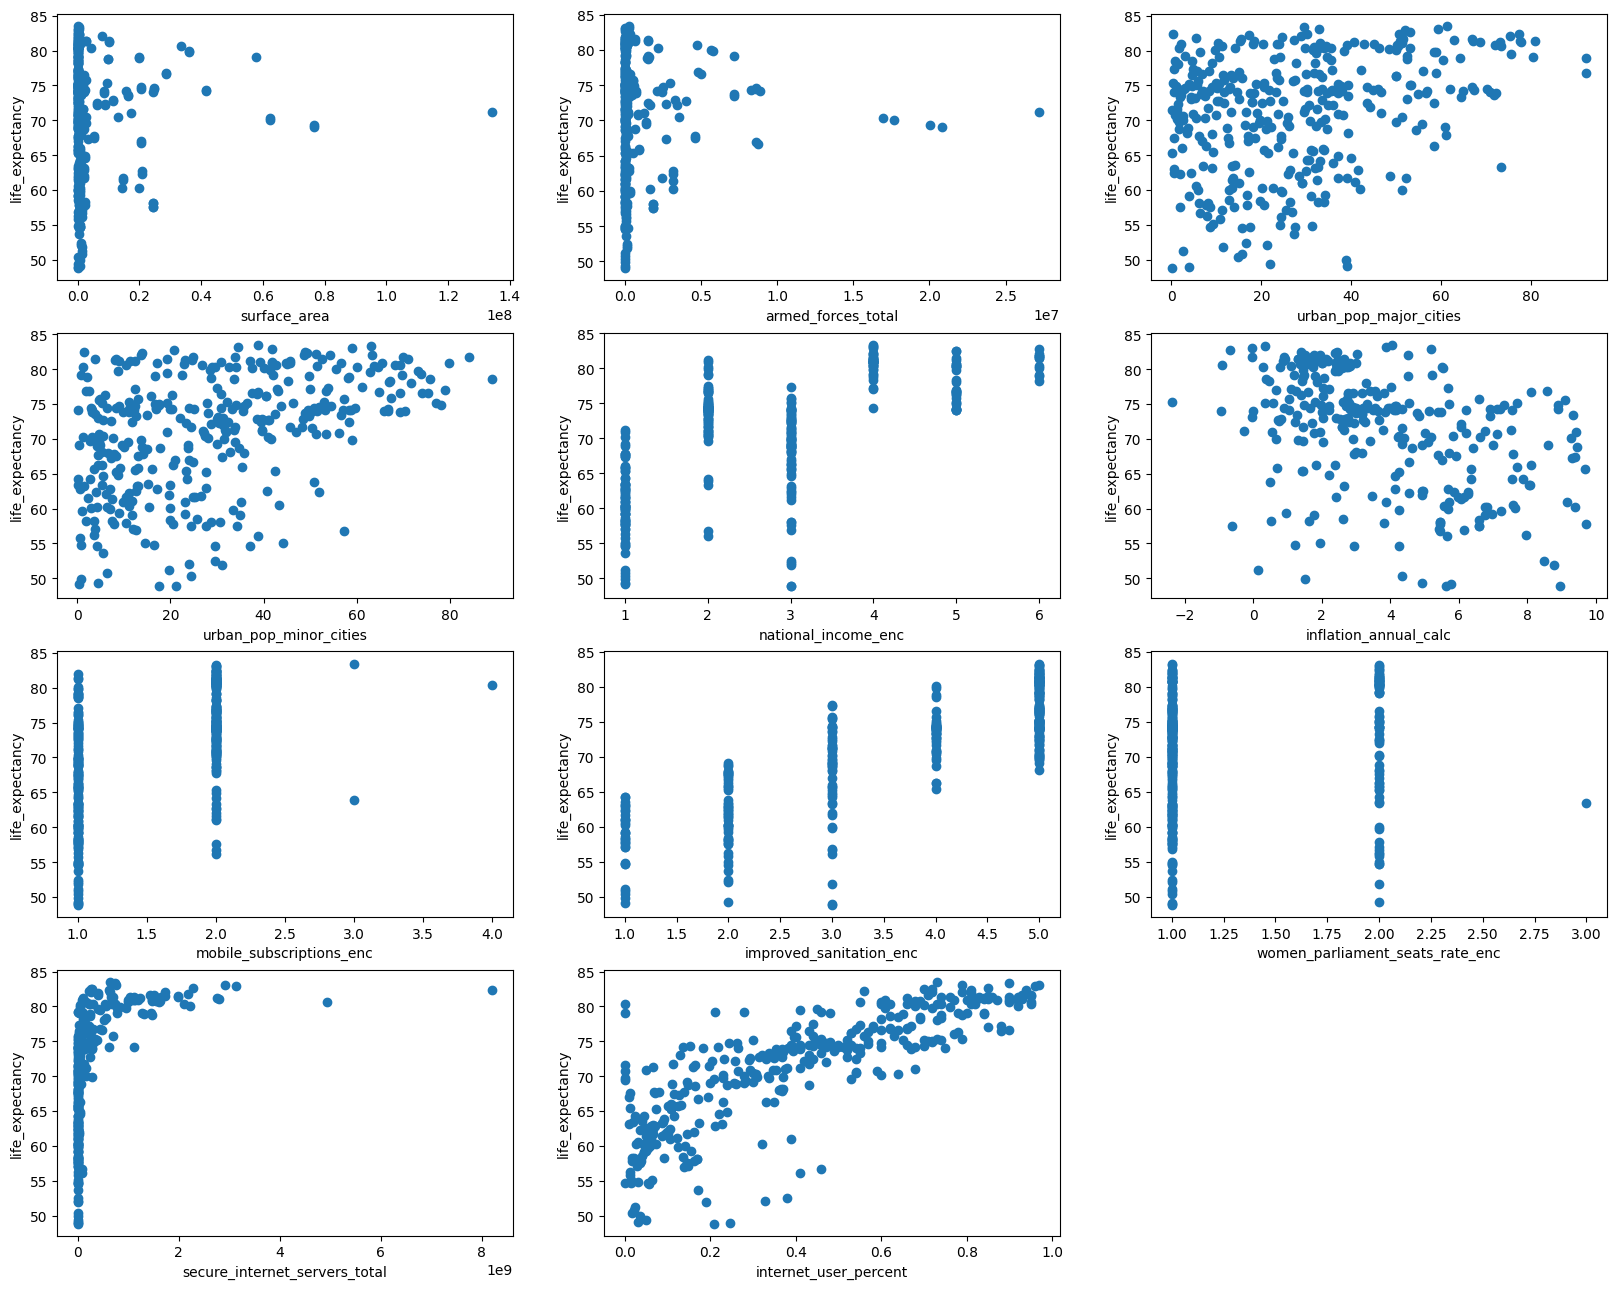

In [24]:
'''=== Show the linear relationship between features and output class. Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(20, 20))

for i, col in enumerate(train_final_df.columns[0:11]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = train_final_df[col] #x-axis
    y = train_final_df['life_expectancy'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    #plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('life_expectancy') # y-label
    

# Feature Engineering - Imputation, Scaling

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
num_scaler = StandardScaler()

X, y = train_final_df.drop(columns=['life_expectancy']), train_final_df['life_expectancy']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape, X_test.shape)

(362, 11) (362,)
(271, 11) (91, 11)


In [26]:
X_train_impute = num_imputer.fit_transform(X_train)
X_train_scale = num_scaler.fit_transform(X_train_impute)
print(X_train_scale.shape)

(271, 11)


# Model Training

In [55]:
'''===== Build MLP Network ====='''
import tensorflow as tf
from tensorflow import keras as ks
from keras.callbacks import EarlyStopping

#get number of columns in training data
n_cols = X_train_scale.shape[1]

# builds model
nn_model = ks.Sequential()

nn_model.add(ks.layers.Dense(100, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
nn_model.add(ks.layers.Dense(200, activation=tf.nn.relu))
#nn_model.add(ks.layers.Dense(400, activation=tf.nn.relu))
#nn_model.add(ks.layers.Dense(400, activation=tf.nn.relu))
nn_model.add(ks.layers.Dense(100, activation=tf.nn.relu))
nn_model.add(ks.layers.Dense(1))

#compile model
nn_model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
nn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 100)               1200      
                                                                 
 dense_38 (Dense)            (None, 200)               20200     
                                                                 
 dense_39 (Dense)            (None, 100)               20100     
                                                                 
 dense_40 (Dense)            (None, 1)                 101       
                                                                 
Total params: 41601 (162.50 KB)
Trainable params: 41601 (162.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = nn_model.fit(X_train_scale, y_train, epochs=100, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 1s 28ms/step - loss: 5050.6631 - mae: 70.5748 - val_loss: 4727.5151 - val_mae: 68.2396
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 4812.1836 - mae: 68.8701 - val_loss: 4414.4834 - val_mae: 65.9110
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 4367.2778 - mae: 65.5605 - val_loss: 3834.2363 - val_mae: 61.3464
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 3573.1543 - mae: 59.1060 - val_loss: 2879.1597 - val_mae: 52.9055
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 2359.6067 - mae: 47.6158 - val_loss: 1598.7603 - val_mae: 38.4607
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 1028.7098 - mae: 29.7205 - val_loss: 501.4799 - val_mae: 19.3544
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 438.8917 - mae: 15.0260 - val_loss: 267.0309 - val_mae: 12.4728
Epoch 8/100
7/7 [==========================

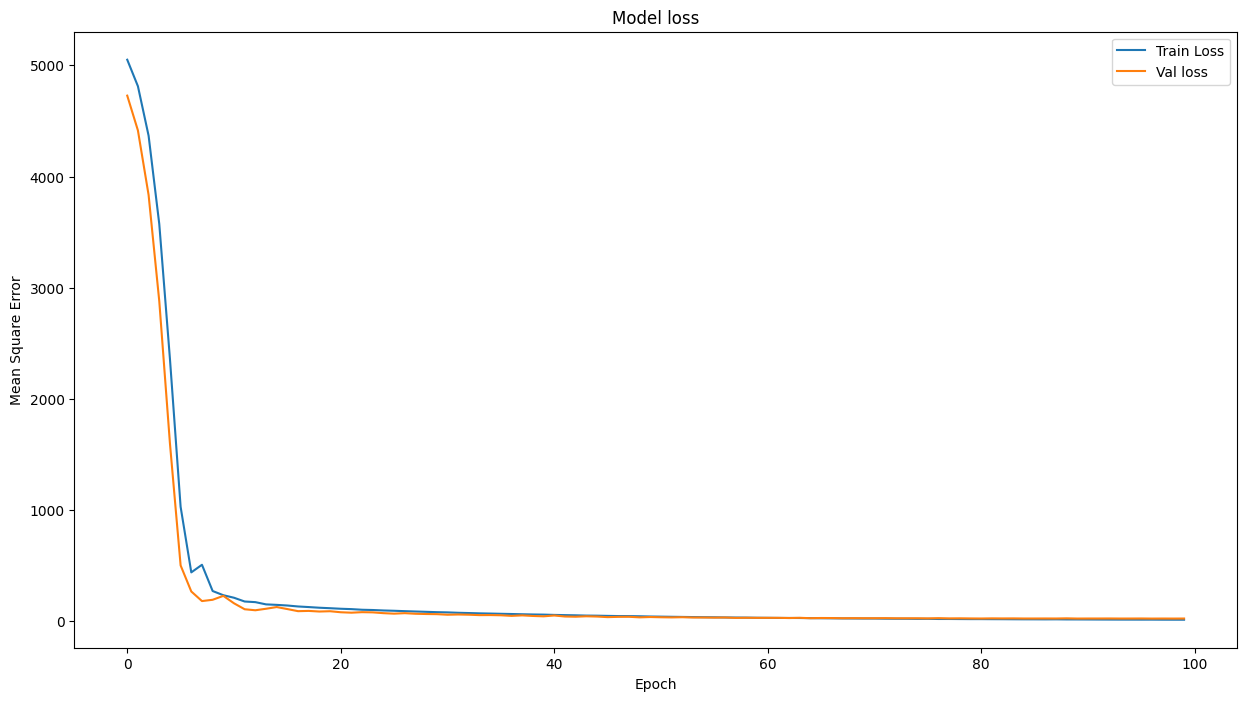

In [57]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [58]:
# Preprocess X_test for prediction
X_test_impute = num_imputer.transform(X_test)
X_test_scale = num_scaler.transform(X_test_impute)
print(X_test_scale.shape)

(91, 11)


In [59]:
# check the model performace in test dataset
score = nn_model.evaluate(X_test_scale, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

3/3 [==============================] - 0s 3ms/step - loss: 45.3890 - mae: 4.5515
loss value:  45.38899230957031
Mean absolute error:  4.551506042480469


In [60]:
# Prediction
y_pred = nn_model.predict(X_test_scale).flatten()
print(y_pred[0:10])

3/3 [==============================] - 0s 2ms/step
[72.09802  69.59818  68.10719  81.201454 61.953266 66.03671  80.769615
 62.146336 65.18911  84.580864]


In [61]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
print("--------------------------------------")
print("Mean squared error :", mean_squared_error(y_test,y_pred))
print("Root Mean squared error :", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean squared Log error :", mean_squared_log_error(y_test,y_pred))
print("Root Mean squared Log error :", np.sqrt(mean_squared_log_error(y_test,y_pred)))
print("Mean Absolute error :", mean_absolute_error(y_test,y_pred))
print("Mean Absolute Percentage error :", mean_absolute_percentage_error(y_test,y_pred))
print("R2 Score :", r2_score(y_test,y_pred))
print("--------------------------------------")

--------------------------------------
Mean squared error : 45.38898356034224
Root Mean squared error : 6.737134669898045
Mean squared Log error : 0.007849523164789608
Root Mean squared Log error : 0.08859753475571207
Mean Absolute error : 4.551505524466753
Mean Absolute Percentage error : 0.06456826666987622
R2 Score : 0.25731092980140624
--------------------------------------


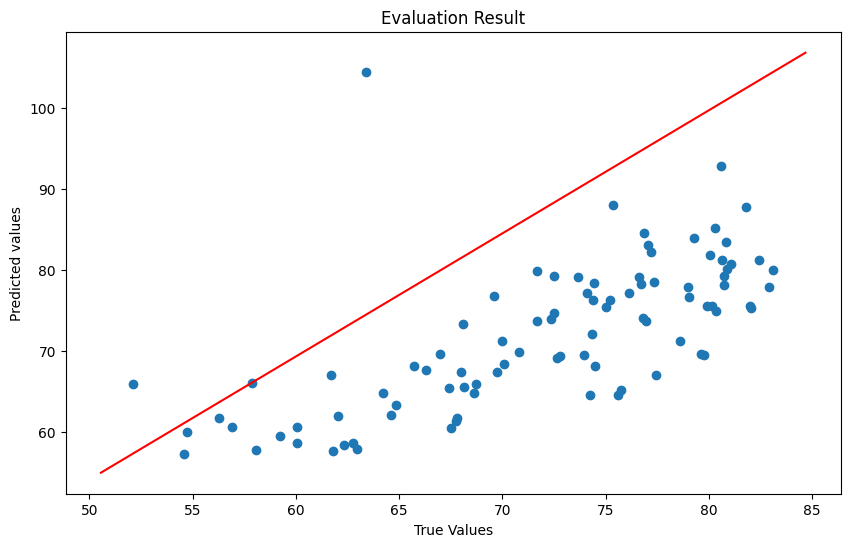

In [68]:
# visualize the prediction uisng diagonal line
y = y_pred #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

# Inference 

In [69]:
test_df = pd.read_csv('/Users/adityan/Work/ds_practice/npci_ds_test/NPCI_DS_ML2/test.csv').drop(columns=['Unnamed: 0'])
test_df.head(5)

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate
0,322460.0,2.088892e+07,1.054769e+07,NaN,0.846584,51.919416,low,2.569961,NaN,NaN,less than 1 per person,84 per 1000 people,1849926.0,very low access,[0%-25%)
1,513120.0,2.220651e+07,1.641032e+07,453550.0,42.139810,5.803190,low,2.184886,NaN,NaN,more than 1 per person,289 per 1000 people,17983312.0,very high access,[0%-25%)
2,18580.0,1.872230e+05,8.527691e+05,NaN,1.699056,67.396944,unknown,NaN,NaN,NaN,less than 1 per person,66 per 100 people,240458015.0,very high access,unknown
3,112490.0,3.252347e+06,4.857911e+06,20000.0,48.602426,4.934574,low,NaN,0.430158,NaN,less than 1 per person,178 per 1000 people,9427882.0,high access,[0%-25%)
4,783560.0,3.911844e+07,1.171853e+07,612800.0,43.734006,28.635994,medium low,NaN,0.624424,NaN,less than 1 per person,46 per 100 people,50379814.0,very high access,[0%-25%)


In [74]:
def preprocessing(df):
    test_cols = ['surface_area','armed_forces_total','urban_pop_major_cities','urban_pop_minor_cities','national_income_enc'
               ,'inflation_annual_calc','mobile_subscriptions_enc','improved_sanitation_enc','women_parliament_seats_rate_enc'
               ,'secure_internet_servers_total','internet_user_percent']
    df['inflation_annual_calc'] = np.where(df['inflation_annual'].isnull()
                                               ,df['inflation_monthly']*12
                                               ,df['inflation_annual']
                                              )
    national_income_cond_list = [df['national_income']=='unknown'
                             ,df['national_income']=='very low'
                             ,df['national_income']=='medium low'
                             ,df['national_income']=='low'
                             ,df['national_income']=='high'
                             ,df['national_income']=='medium high'
                             ,df['national_income']=='very high']  
    national_income_choice_list = [np.nan,1,2,3,4,5,6]
    
    mobile_subscription_cond_list = [df['mobile_subscriptions']=='unknown'
                                    ,df['mobile_subscriptions']=='less than 1 per person'
                                    ,df['mobile_subscriptions']=='more than 1 per person'
                                    ,df['mobile_subscriptions']=='more than 2 per person'
                                    ,df['mobile_subscriptions']=='more than 3 per person']
    mobile_subscription_choice_list = [np.nan,1,2,3,4]
    
    improved_sanitation_cond_list = [df['improved_sanitation']=='no info'
                                     ,df['improved_sanitation']=='very low access'
                                     ,df['improved_sanitation']=='low access'
                                     ,df['improved_sanitation']=='medium access'
                                     ,df['improved_sanitation']=='high access'
                                     ,df['improved_sanitation']=='very high access']
    improved_sanitation_choice_list = [np.nan,1,2,3,4,5]
    
    women_parliament_seats_rate_cond_list = [df['women_parliament_seats_rate']=='unknown'
                                             ,df['women_parliament_seats_rate']=='[0%-25%)'
                                             ,df['women_parliament_seats_rate']=='[25%-50%)'
                                             ,df['women_parliament_seats_rate']=='[50%-75%)']
    women_parliament_seats_rate_choice_list = [np.nan,1,2,3]
    
    df['national_income_enc'] = np.select(national_income_cond_list
                                                                         ,national_income_choice_list
                                                                         ,default=0)
    df['mobile_subscriptions_enc'] = np.select(mobile_subscription_cond_list
                                                                         ,mobile_subscription_choice_list
                                                                         ,default=0)
    df['improved_sanitation_enc'] = np.select(improved_sanitation_cond_list
                                                                         ,improved_sanitation_choice_list
                                                                         ,default=0)
    df['women_parliament_seats_rate_enc'] = np.select(women_parliament_seats_rate_cond_list
                                                                         ,women_parliament_seats_rate_choice_list
                                                                         ,default=0)
    df['internet_users'] = np.where(df['internet_users']=='unknown','0 per 100 people',df['internet_users'])
    df['internet_user_percent'] = df['internet_users'].apply(lambda x: float(x.split()[0])/float(x.split()[2]))

    return df[test_cols]

In [75]:
test_preprocessed_df = preprocessing(test_df)
test_preprocessed_df.head()

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income_enc,inflation_annual_calc,mobile_subscriptions_enc,improved_sanitation_enc,women_parliament_seats_rate_enc,secure_internet_servers_total,internet_user_percent
0,322460.0,NaN,0.846584,51.919416,3.0,2.569961,1.0,1.0,1.0,1849926.0,0.084
1,513120.0,453550.0,42.139810,5.803190,3.0,2.184886,2.0,5.0,1.0,17983312.0,0.289
2,18580.0,NaN,1.699056,67.396944,NaN,NaN,1.0,5.0,NaN,240458015.0,0.660
3,112490.0,20000.0,48.602426,4.934574,3.0,5.161899,1.0,4.0,1.0,9427882.0,0.178
4,783560.0,612800.0,43.734006,28.635994,2.0,7.493090,1.0,5.0,1.0,50379814.0,0.460


In [76]:
#Feature Engineering
test_impute = num_imputer.transform(test_preprocessed_df)
test_scale = num_scaler.transform(test_impute)

pred = nn_model.predict(test_scale).flatten()
print(pred[0:10])

4/4 [==============================] - 0s 1ms/step
[70.38212  73.06137  78.9453   66.59788  76.15574  66.50787  73.00066
 66.58439  69.933716 67.867966]
